In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import math
import pylab
import matplotlib.pyplot as plt

# data

In [2]:
df=pd.read_csv("C:\\Users\\Neeraj\\Downloads\\Admission_Prediction.csv",index_col=0)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93


# data cleaning

In [3]:
df.shape

(500, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          485 non-null    float64
 1   TOEFL Score        490 non-null    float64
 2   University Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 35.2 KB


In [5]:
df.isna().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
for i in df.columns:
    if df[i].isna().sum()>0:
        df[i].fillna(df[i].median(),inplace=True)

# data analysis

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.572000,107.184000,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.104207,6.051395,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.corr()["Chance of Admit"].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.802321
TOEFL Score          0.786543
SOP                  0.684137
University Rating    0.681482
LOR                  0.645365
Research             0.545871
Name: Chance of Admit, dtype: float64

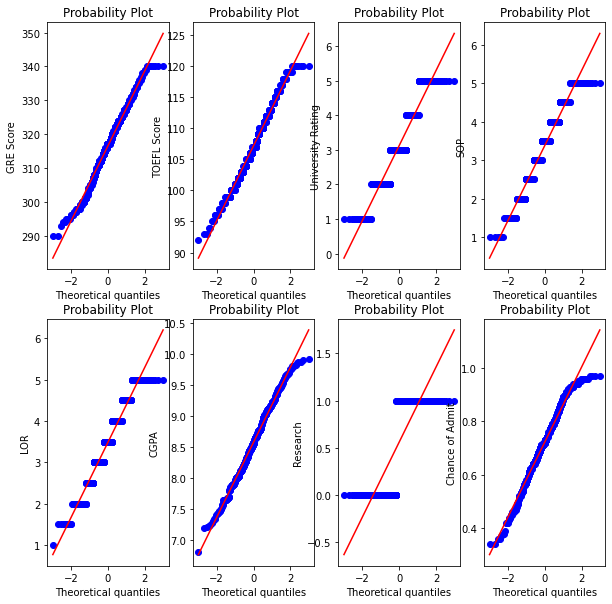

In [9]:
plt.figure(figsize=(10,10))
c=1
for i in df.columns:
    if c<9:
        plt.subplot(2,4,c)
        st.probplot(df[i],dist="norm",plot=pylab);
        plt.ylabel(i)
        c=c+1
    
    

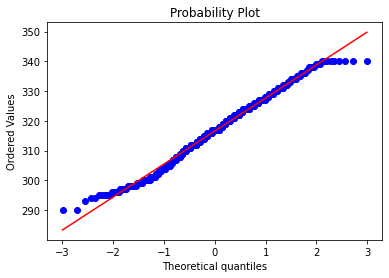

In [10]:
st.probplot(df["GRE Score"],dist="norm",plot=pylab);

In [11]:
df.skew()

GRE Score           -0.056060
TOEFL Score          0.104963
University Rating    0.102097
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

In [12]:
df.kurt()

GRE Score           -0.612418
TOEFL Score         -0.616477
University Rating   -0.766867
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64

In [13]:
v=st.yeojohnson(df["GRE Score"])

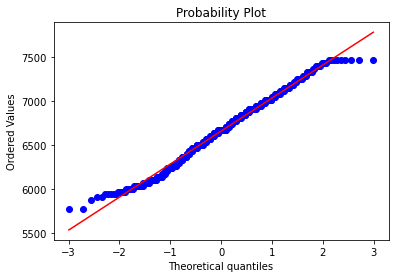

In [14]:
st.probplot(v[0],dist="norm",plot=pylab);

In [15]:
x=df.drop(columns=["Chance of Admit"])
y=df["Chance of Admit"]

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
x_scaled=scaler.fit_transform(x)

# data split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.10,random_state=123)

# model fit

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.intercept_

0.3462078676746799

In [25]:
lr.coef_

array([0.10675945, 0.07293531, 0.01290769, 0.00803676, 0.06653621,
       0.37493868, 0.02373525])

# model prediction

In [26]:
m=0.3462078676746799
x=330.0
c=0.10675945
y=m*x+c
y

114.35535578264438

In [27]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
3,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93


# performance metrics


In [28]:
y_pred = lr.predict(x_test)

In [29]:
y_test

Serial No.
230    0.82
338    0.94
328    0.69
417    0.65
307    0.79
132    0.77
6      0.90
432    0.73
435    0.64
135    0.89
277    0.89
265    0.75
35     0.94
275    0.58
490    0.65
12     0.84
379    0.56
468    0.78
426    0.92
242    0.65
94     0.44
311    0.76
190    0.88
278    0.70
139    0.80
333    0.75
314    0.67
60     0.42
213    0.95
172    0.89
376    0.38
86     0.76
267    0.72
37     0.64
273    0.49
288    0.89
186    0.89
339    0.81
34     0.90
344    0.59
364    0.69
10     0.45
205    0.69
473    0.90
49     0.82
281    0.68
16     0.54
185    0.72
25     0.97
83     0.92
Name: Chance of Admit, dtype: float64

In [30]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [31]:
r2_score(y_test,y_pred)

0.7731323352280923

In [32]:
mean_squared_error(y_test,y_pred)

0.005171393970236089

In [33]:
mean_absolute_percentage_error(y_test,y_pred)

0.08132269226042833

In [34]:
mean_absolute_error(y_test,y_pred)

0.04776271248318863

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.07191240484253109

In [36]:
c=x_test[:,0]
c

array([0.68, 0.84, 0.1 , 0.5 , 0.66, 0.26, 0.8 , 0.6 , 0.32, 0.86, 0.78,
       0.7 , 0.82, 0.5 , 0.54, 0.74, 0.26, 0.56, 0.66, 0.54, 0.22, 0.6 ,
       0.68, 0.6 , 0.72, 0.36, 0.22, 0.42, 0.96, 0.88, 0.28, 0.58, 0.44,
       0.54, 0.08, 0.68, 0.74, 0.54, 1.  , 0.3 , 0.32, 0.66, 0.16, 0.74,
       0.62, 0.42, 0.48, 0.52, 0.92, 0.6 ])

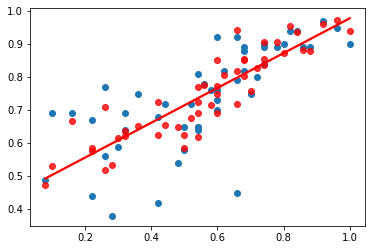

In [40]:
import warnings
warnings.filterwarnings("ignore")
plt.scatter(c,y_test)
sns.regplot(c,y_pred,ci=False,color="red");


# optimization

In [38]:
from sklearn.linear_model import 

SyntaxError: invalid syntax (Temp/ipykernel_20548/3620533937.py, line 1)